# **Limiarização, Binarição e Limiarização Adaptativa**

Topicos:
1. Imagens binarizadas
2. Métodos de limiarização
3. Limiarização adaptativa

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

def imshow(image = None, size = 10):
    h, w = image.shape[0], image.shape[1]
    aspect_ratio = h/w
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

### **Métodos de Limiarização** 

![](images/thresh.png)
![](images/thresh2.png)

https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html

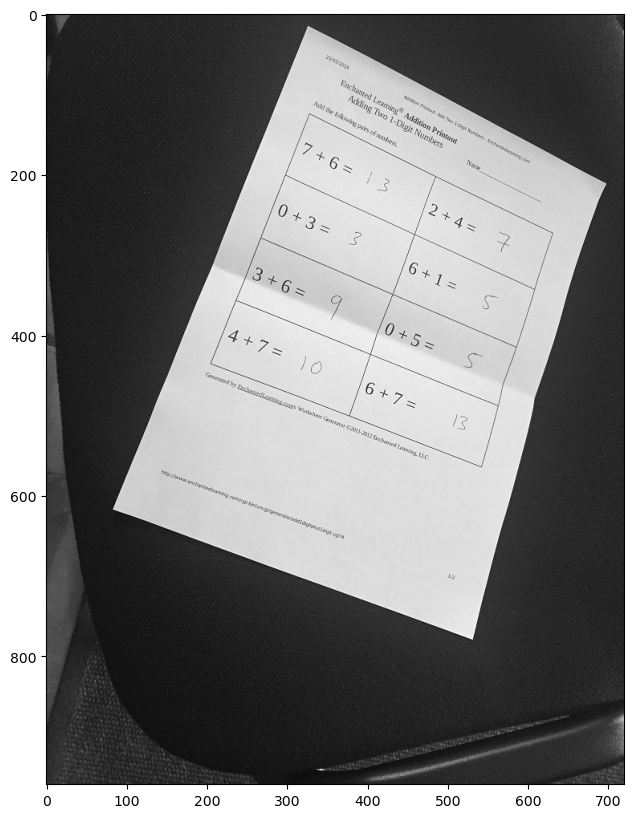

In [2]:
# Carregar nossa imagem em escala de cinza.
image = cv2.imread('images/scan.jpg',0)
imshow(image)


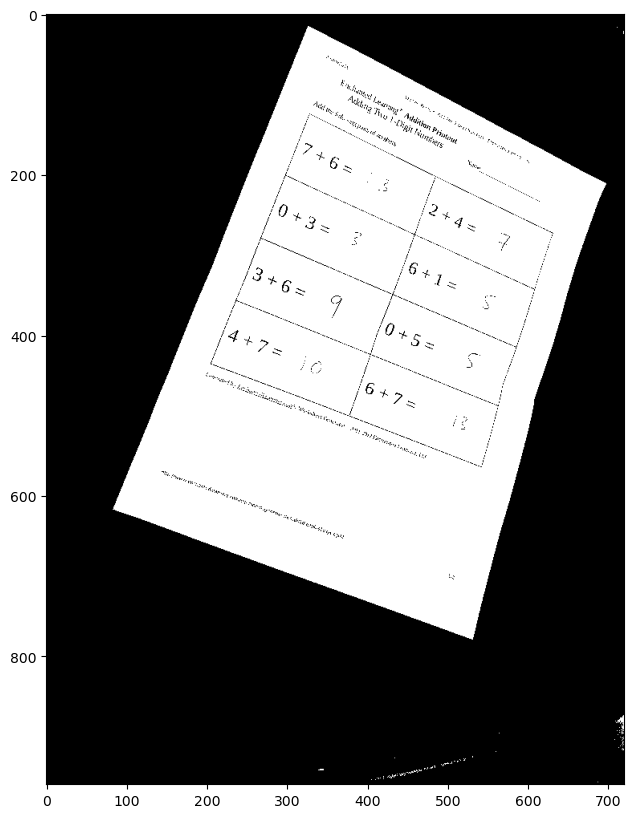

In [3]:

# Valores abaixo de 127 são atribuídos como 0 ou preto, enquanto valores acima são 
# atribuídos como 255 (branco).
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
imshow(thresh1)



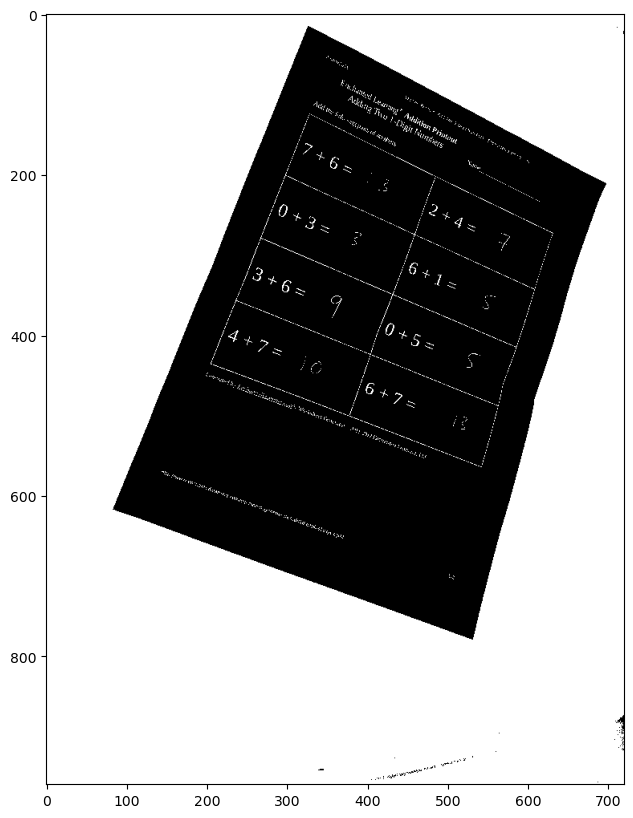

In [4]:

# Valores abaixo de 127 são atribuídos como 255 e valores acima são atribuídos 
# como 0 (inverso do exemplo anterior).
ret,thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
imshow(thresh2)



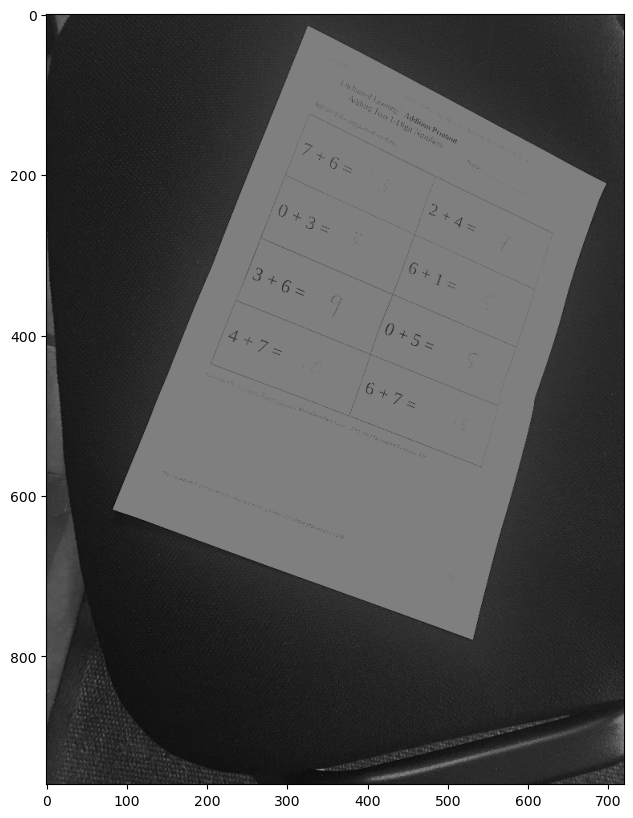

In [5]:

# Valores acima de 127 são truncados (mantidos) em 127 (o argumento 
# 255 não é utilizado).
ret,thresh3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
imshow(thresh3)



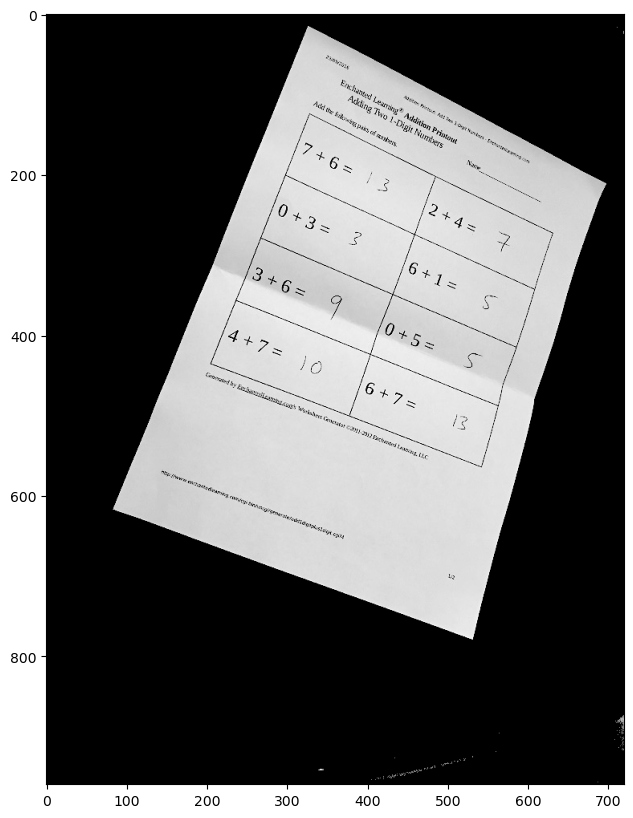

In [6]:

# Valores abaixo de 127 são atribuídos como 0, valores acima de 127 
# permanecem inalterados.
ret,thresh4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
imshow(thresh4)



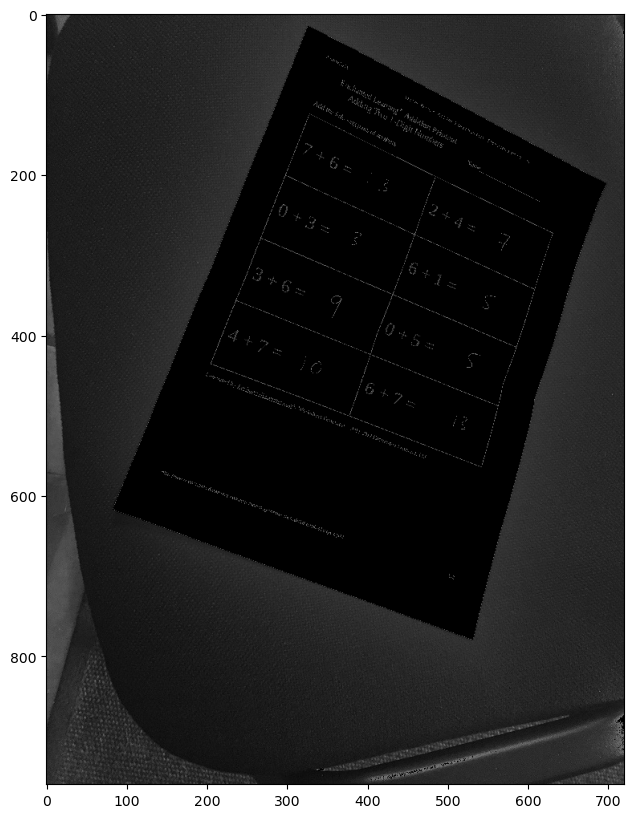

In [7]:

# Inverso do exemplo anterior, valores abaixo de 127 permanecem inalterados, valores 
# acima de 127 são atribuídos como 0.
ret,thresh5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
imshow(thresh5)

#### **Limiarização Adaptativa**

1. ADAPTIVE_THRESH_MEAN_C
2. THRESH_OTSU

#### **Parâmetros do cv2.adaptiveThreshold**

``**cv2.adaptiveThreshold**(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) → dst``

- **src** - Imagem de origem em escala de cinza de 8 bits e um único canal.
- **dst** - Imagem de destino do mesmo tamanho e tipo que src.
- **maxValue** - Valor não nulo atribuído aos pixels que satisfazem a condição. Veja os detalhes abaixo.
- **adaptiveMethod** - Algoritmo de limiarização adaptativa a ser usado, ADAPTIVE_THRESH_MEAN_C ou ADAPTIVE_THRESH_GAUSSIAN_C. Veja os detalhes abaixo.
- **thresholdType** - Tipo de limiarização que deve ser THRESH_BINARY ou THRESH_BINARY_INV.
- **blockSize** - Tamanho da vizinhança de pixels usado para calcular o valor do limiar para o pixel: 3, 5, 7, e assim por diante.
- **C** - Constante subtraída da média ou média ponderada. Normalmente, é um valor positivo, mas também pode ser zero ou negativo.


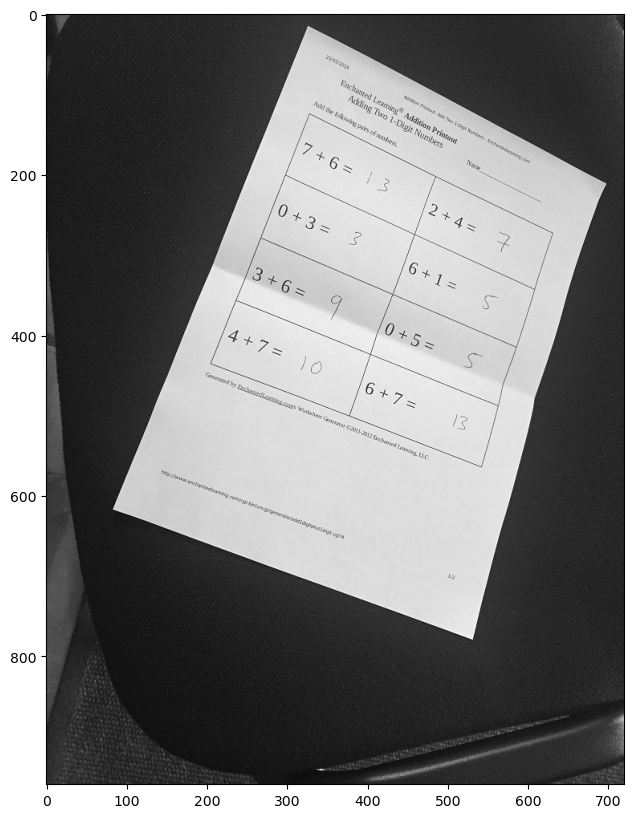

In [8]:
image = cv2.imread('images/scan.jpg',0)
imshow(image)



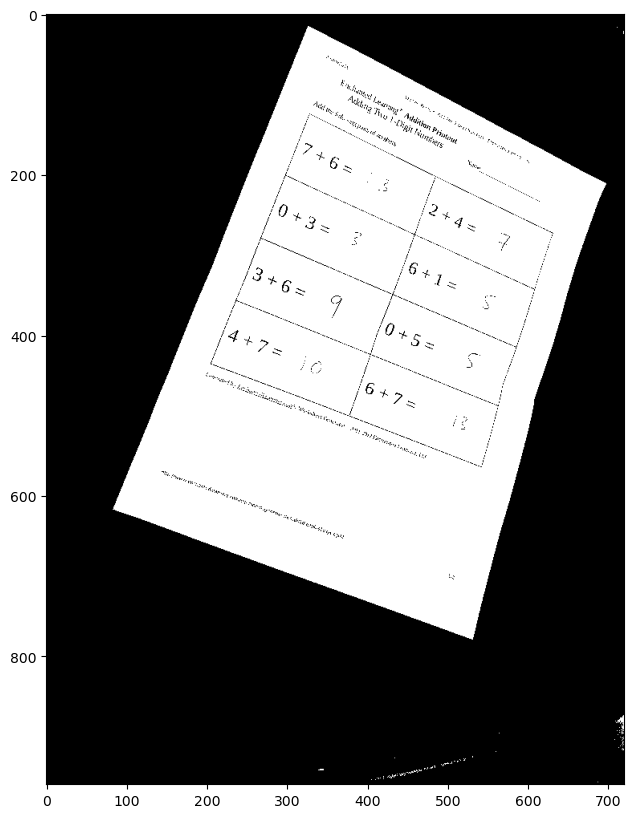

In [9]:

# Valores abaixo de 127 são atribuídos como 0 (preto), enquanto valores acima 
# são atribuídos como 255 (branco).
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
imshow(thresh1)



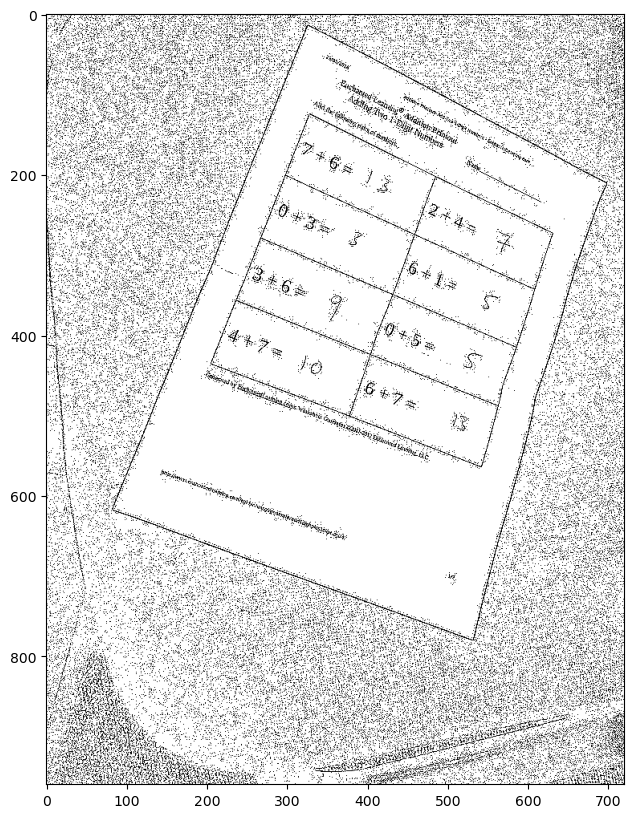

In [10]:
# Usando adaptiveThreshold
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 
imshow(thresh) 



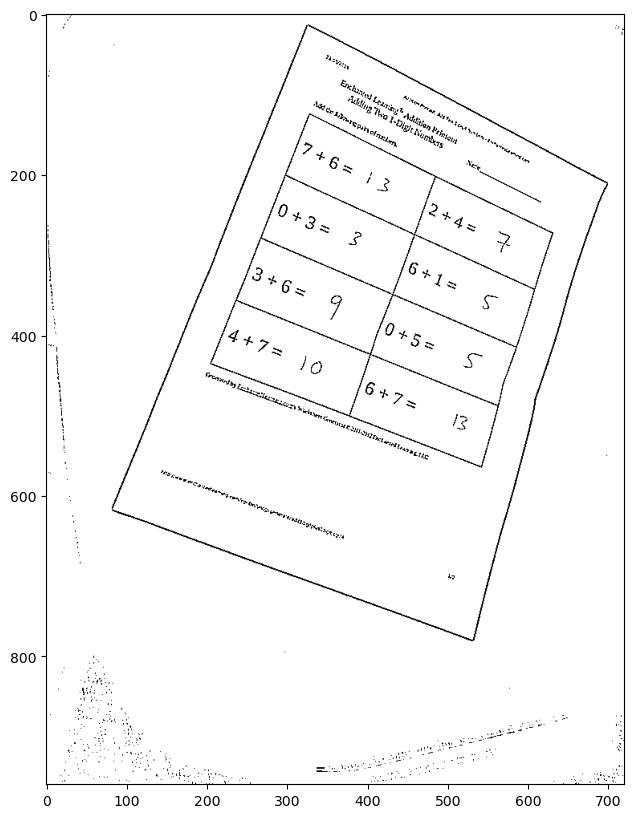

In [11]:
# Blur
blur = cv2.GaussianBlur(image, (3, 3), 0)

# Usando adaptiveThreshold
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 
imshow(thresh) 

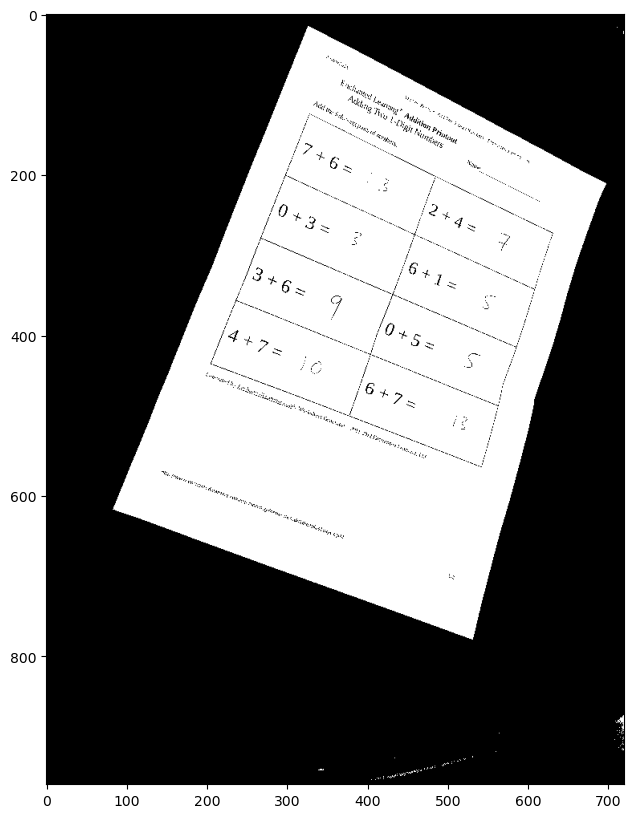

In [12]:

# Usando OTSU
_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow(th2) 
